# Contributions

**ADITI PURI**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 1<br>
[1] Data preprocessing<br>
[2] Build DL model with pretrained model and fine-tuning<br>
[3] Train DL model<br>
[4] Evaluate DL model<br>
[5] Experiment other ways of the model building e.g. Vision Transformer, Keras hyperparameter tuning<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix<br>
[7] Final Code review
<br>
<br>
<br>
**MINGYANG HOU**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 1<br>
[1] Data preprocessing<br>
[2] Build DL model with pretrained model and fine-tuning<br>
[3] Train DL model<br>
[4] Evaluate DL model<br>
[5] Experiment other ways of the model building e.g. Vision Transformer, Keras hyperparameter tuning<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix<br>
[7] Final Code review
<br>
<br>
<br>
**CINDY TAO**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 1<br>
[1] Data preprocessing<br>
[2] Build DL model with pretrained model and fine-tuning<br>
[3] Train DL model<br>
[4] Evaluate DL model<br>
[5] Experiment other ways of the model building e.g. Vision Transformer, Keras hyperparameter tuning<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix<br>
[7] Final Code review
<br>
<br>
<br>
**CHRISTOPHER CHOONG**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 2<br>
[1] Discussed and helped prepare and pre-process dataset<br>
[2] Built KNN model and tuned hyperparameters<br>
[3] Trained and tested KNN model, evaluated results and plotted confusion matrix<br>
[4] Discussed and helped evaluate the performance of ML models<br>
[5] Assisted in code review during development<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix<br>
[7] Final code review
<br>
<br>
<br>
**JIANGLI SHI**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 2<br>
[1] Discussed and helped preprocess the dataset.<br>
[2] Build Random Forest model with default hyperparameters. Train and test the model. Plot the confusion matrix.<br>
[3] Hyperparameter tuning for Random Forest model.<br>
[4] Build a second Random Forest model with one hyperparameter optimized. Train and test the model.<br>
[5] Evaluate the performance of the Random Forest model.<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix.<br>
[7] Final code review.
<br>
<br>
<br>
**JUSTIN FANG**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 2<br>
[1] Assisted the initial draft of data preparation and feature engineering processes<br>
[2] Worked on the KNN model and its hyperparameter tuning<br>
[3] Participated in discussion for code review and outcome improvement<br>
[4] Final code review<br>

Task 3<br>
[5] Participated in drafting and summarising Task 3
<br>
<br>
<br>
**WOON XUEN THEE**

**Self-assessment factor**: 1

**Contributions:**<br>
Task 2<br>
[1] Conducted data preprocessing on dataset (normalisation and resizing the dimension of the dataset).<br>
[2] Build four machine learning models (KNN, Decision Tree Classifer, Random Forest Classifer, Naive Bayes) to train and test on the dataset as well as to determine which model is best suited to be used.<br>
[3] Evaluate all four models and generated a bar graph to display the performance/accuracy score.<br>
[4] Tested the Random Forest Classifer model with images  obtained from external source (Google Image).<br>

Task 3<br>
[6] Discussed and helped draft the evaluation report in appendix<br>
[7] Final code review 


# Task 1 - Deep Learning 


## Learning type of the problem
multiclass image classification on all cifar10 datasets 

## Framework to solve the problem
- Tensorflow 
- Keras 

## Architecture to solve the problem
- Convolutional Neural Network (CNN)

## Importing the libraries

In [ ]:
#importing the libraries

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Data loading and preprocessing

In [ ]:
#load dataset
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Define Class in CIFAR10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#Matplotlib plot configuration
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='f3ebeb', titlesize="large", edgecolor='white')
plt.rc('text', color='c71d23')
plt.rc('figure', facecolor='e5dfdf')
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# function to display a row of digits with their predictions
def plot_images(n, digits, predictions, labels, title):

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(15, 3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(n):
    ax = fig.add_subplot(1, n, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])


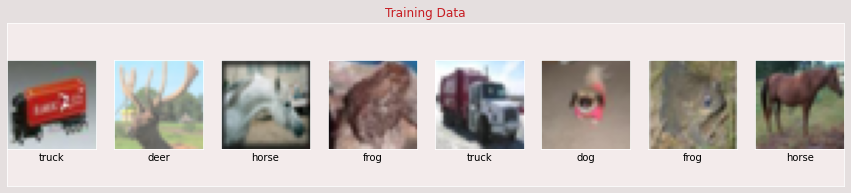

In [ ]:
plot_images(8, x_train, y_train, y_train, "Training Data" )

In [ ]:
#Splitting training dataset into training and validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000, 1) (10000, 1)


In [ ]:
#normalization on images in training set and test set
def image_preprocess(img):
  img = img.astype('float32')
  output_img = tf.keras.applications.resnet50.preprocess_input(img) 
  return output_img

In [ ]:
x_train_norm = image_preprocess(x_train)
x_valid_norm = image_preprocess(x_valid)

## Finetuning ResNet50 Model

In [ ]:
#instaniate pretrained model ResNet50 for future finetuning
def pretrained_model(inputs):
  # resize images to match the config in ResNet50
  pretrained = ResNet50(input_shape=(224, 224, 3),
                          include_top=False,
                          weights='imagenet')(inputs)
  return pretrained

#classifer layers for fintuning: Kera layers with personalized parameters 
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

#final layer 
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs) #unsample by 7x7. So transform inital dataset 32x32 to 224x224 for feature extr

    resnet_pretrained = pretrained_model(resize)
    classification_output = classifier(resnet_pretrained)

    return classification_output

#complie into a model
def finetuned_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

model = finetuned_model()

model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                              

In [ ]:
# Configure keras callbacks
callbacks = [
    EarlyStopping(patience=5,
                  verbose=1),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                    verbose=1, 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=5,
                      min_lr=0.001)
]

In [ ]:
# Train the model
EPOCHS = 100
history = model.fit(x_train_norm,
                    y_train,
                    epochs=EPOCHS,
                    callbacks=callbacks,
                    validation_data = (x_valid_norm, y_valid), 
                    batch_size=32)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.8412
Epoch 1: val_loss improved from inf to 0.19214, saving model to model.01-0.19.h5
1250/1250 [==============================] - 440s 338ms/step - loss: 0.4707 - accuracy: 0.8412 - val_loss: 0.1921 - val_accuracy: 0.9353 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9499
Epoch 2: val_loss improved from 0.19214 to 0.18562, saving model to model.02-0.19.h5
1250/1250 [==============================] - 420s 336ms/step - loss: 0.1508 - accuracy: 0.9499 - val_loss: 0.1856 - val_accuracy: 0.9371 - lr: 0.0100
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9762
Epoch 3: val_loss improved from 0.18562 to 0.17890, saving model to model.03-0.18.h5
1250/1250 [==============================] - 420s 336ms/step - loss: 0.0726 - accuracy: 0.9762 - val_loss: 0.1789 - val_accuracy: 0.9481 - lr: 0.0100
Ep

## Trend of training error & accuracy during epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


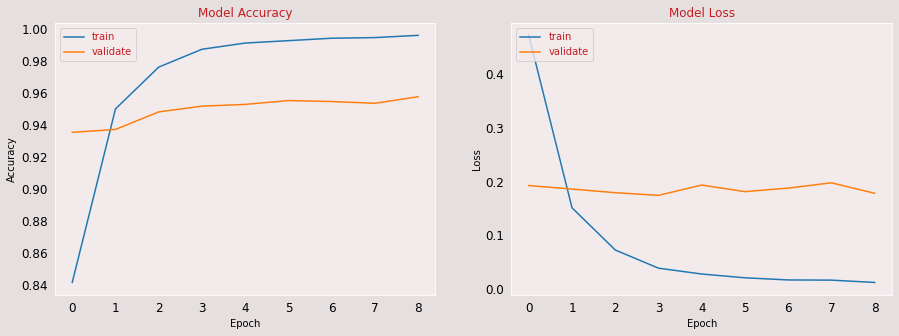

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())
plotmodelhistory(history)

## Performance assessment with test dataset

In [ ]:
# Normalise data
x_test_norm = image_preprocess(x_test)

# Evaluate the performance with test dataset
final_test = model.evaluate(x_test_norm, y_test, batch_size=32)

print("Loss of the model with test data: ", final_test[0])
print("Accuracy of the model with test data: ", final_test[1])

313/313 [==============================] - 30s 95ms/step - loss: 0.1967 - accuracy: 0.9525
Loss of the model with test data:  0.19665266573429108
Accuracy of the model with test data:  0.9524999856948853


## Prediction classes for test data

In [ ]:
# make prediction.
pred = model.predict(x_test, batch_size=64)

# Convert predictions classes to one hot vectors 
pred = np.argmax(pred, axis=1)

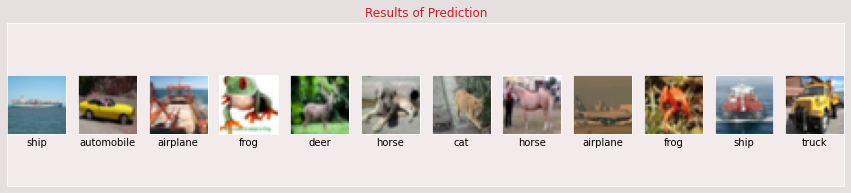

In [ ]:
# plot the samples of prediction results
plot_images(12, x_test, pred, y_test, "Results of Prediction")

## Samples of Predicted Comparison

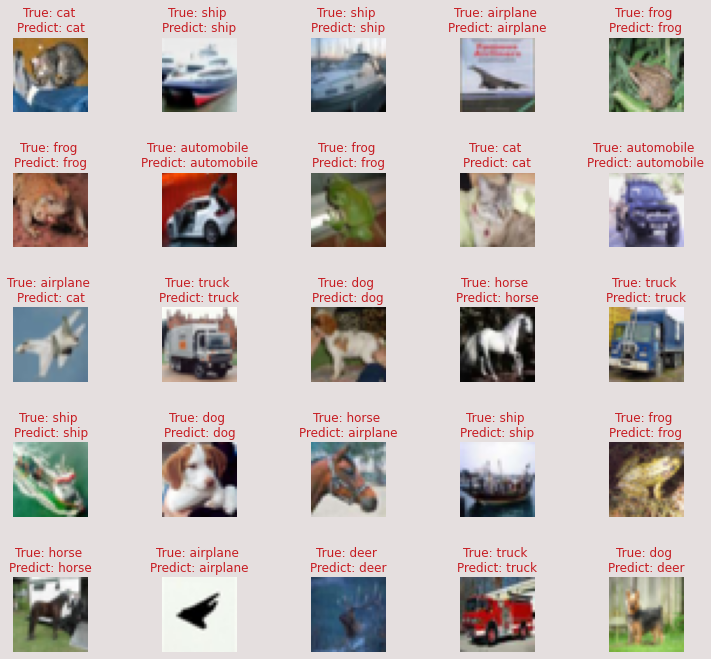

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i].astype('uint8'), cmap = plt.cm.bone)
    axes[i].set_title(f"True: {classes[int(y_test[i])]} \nPredict: {classes[int(pred[i])]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

## Confusion Matrix for prediction results

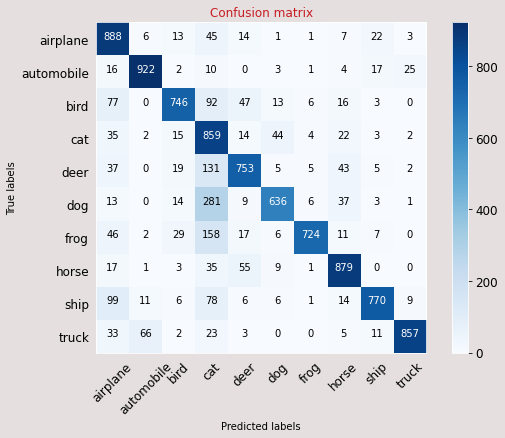

In [ ]:
cm = confusion_matrix(y_test, pred) 
matrix_labels = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
   
     
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()

plot_confusion_matrix(cm, matrix_labels)
    

## Reference

 fchollet n.d., *Google Colaboratory,* viewed 1 June 2022, <https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/transfer_learning.ipynb#scrollTo=4lMaKbnP5467>.

chaudhury,  jayram 2020, ‘Project on Image Classification on cifar 10 dataset’, Medium, viewed 30 May 2022, <https://medium.com/@jayramchaudhury20/project-on-image-classification-on-cifar-10-dataset-94db0ff6baf5>.

*cifar10 with CNN for beginer* n.d., viewed 1 June 2022, <https://kaggle.com/roblexnana/cifar10-with-cnn-for-beginer>.

*ResNet50 Transfer Learning CIFAR-10 Beginner* n.d., viewed 2 June 2022, <https://kaggle.com/kutaykutlu/resnet50-transfer-learning-cifar-10-beginner>.
